In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import ttest_ind

In [ ]:
# reading the 311 cfs file from year 2017 through 2024
data_2017 = pd.read_csv('2017_311_Customer_Service_Requests_Yearly_-2387111673037009433.csv')
data_2018 = pd.read_csv('2018_311_Customer_Service_Requests_Yearly_-5376537866461974221.csv')
data_2019 = pd.read_csv('2019_311_Customer_Service_Requests_Yearly_6716224425174750114.csv')
data_2020 = pd.read_csv('2020_311_Customer_Service_Requests_Yearly_-2441087176036723495.csv')
data_2021 = pd.read_csv('2021_311_Customer_Service_Requests_Yearly_7874378841947794383.csv')
data_2022 = pd.read_csv('2022_311_Customer_Service_Requests_Yearly_-2423670097638100540.csv')
data_2023 = pd.read_csv('2023_311_Customer_Service_Requests_2023_2526710291922924069.csv')
data_2024 = pd.read_csv('2024_311_Customer_Service_Requests_2024_-6759726987065076912.csv')

In [ ]:
# displaying the shape of the datasets
print('Shape of 2017 311 cfs dataset: ', data_2017.shape)
print('Shape of 2018 311 cfs dataset: ', data_2018.shape)
print('Shape of 2019 311 cfs dataset: ', data_2019.shape)
print('Shape of 2020 311 cfs dataset: ', data_2020.shape)
print('Shape of 2021 311 cfs dataset: ', data_2021.shape)
print('Shape of 2022 311 cfs dataset: ', data_2022.shape)
print('Shape of 2023 311 cfs dataset: ', data_2023.shape)
print('Shape of 2024 311 cfs dataset: ', data_2024.shape)

Shape of 2017 311 cfs dataset:  (671777, 25)
Shape of 2018 311 cfs dataset:  (792440, 25)
Shape of 2019 311 cfs dataset:  (767903, 25)
Shape of 2020 311 cfs dataset:  (852787, 25)
Shape of 2021 311 cfs dataset:  (987498, 25)
Shape of 2022 311 cfs dataset:  (1009100, 25)
Shape of 2023 311 cfs dataset:  (1025027, 29)
Shape of 2024 311 cfs dataset:  (1043264, 28)


In [ ]:
# concatenating all dataframes along the rows (axis=0), including all columns
merged_data = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021, data_2022, data_2023, data_2024], axis=0, join='outer')

# resetting index
merged_data.reset_index(drop=True, inplace=True)

In [ ]:
merged_data.shape

(7149796, 29)

In [ ]:
merged_data.head()

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID
0,1332708.0,5001K00000jkc4oQAA,18-00888569,TEC-WO Street Markings,Phone,11/8/2017 8:50:49 AM,Closed (Transferred),12/9/2018 12:07:10 PM,5/7/2018 9:50:49 AM,12/9/2018 12:07:09 PM,NaN,Service Response,NaN,NaN,"BELAIR RD & CLIFTON PARK TERR, Baltimore City,...",21213,Belair-Edison,13.0,Northeastern,434.0,39.320841,-76.574586,"(39.320841000000000, -76.574586000000000)",-76.574586,39.320841,NaN,NaN,NaN,NaN
1,1332713.0,5001K00000jkc4yQAA,18-00888571,TEC-WO Street Markings,Phone,11/21/2017 2:04:31 PM,Closed (Transferred),12/9/2018 12:09:14 PM,5/20/2018 3:04:31 PM,12/9/2018 12:09:13 PM,NaN,Service Response,NaN,NaN,"FLEET ST & S STREEPER ST, Baltimore City, 21224",21224,Canton,1.0,Southeastern,232.0,39.285231,-76.576443,"(39.285231000000000, -76.576443000000000)",-76.576443,39.285231,NaN,NaN,NaN,NaN
2,1332721.0,5001K00000jkc5NQAQ,18-00888575,TEC-WO Street Markings,Phone,11/27/2017 8:30:40 AM,Closed (Transferred),12/9/2018 12:11:08 PM,5/26/2018 9:30:40 AM,12/9/2018 12:11:08 PM,NaN,Service Response,NaN,NaN,"7121 PARK HEIGHTS AVE, Baltimore City, 21215",21215,Cross Country,5.0,Northwestern,632.0,39.367991,-76.705952,"(39.367991000000000, -76.705952000000000)",-76.705952,39.367991,NaN,NaN,NaN,NaN
3,1332722.0,5001K00000jkc5rQAA,18-00888578,TEC-WO Street Markings,Phone,11/28/2017 4:08:19 PM,Closed (Transferred),12/9/2018 12:14:56 PM,5/27/2018 5:08:19 PM,12/9/2018 12:14:55 PM,NaN,Service Response,NaN,NaN,"E FAYETTE ST & N BROADWAY, Baltimore City, 21231",21231,Dunbar-Broadway,12.0,Southeastern,212.0,39.293966,-76.594117,"(39.293966000000000, -76.594117000000000)",-76.594117,39.293966,NaN,NaN,NaN,NaN
4,1332728.0,5001K00000jkc6BQAQ,18-00888581,TEC-WO Street Markings,Phone,12/1/2017 3:14:21 PM,Closed (Transferred),12/9/2018 12:16:55 PM,5/30/2018 4:14:21 PM,12/9/2018 12:16:55 PM,NaN,Service Response,NaN,NaN,"N CHARLES ST & SAINT PAUL ST, Baltimore City, ...",21210,Guilford,4.0,Northern,542.0,39.343508,-76.621788,"(39.343508000000000, -76.621788000000000)",-76.621788,39.343508,NaN,NaN,NaN,NaN


In [ ]:
# displaying all the service requests types
merged_data['SRType'].unique()

array(['TEC-WO Street Markings', 'TRM-WO Street and Crosswalk Markings',
       'TRM-Street Repairs', 'TRM-Curb Repair', 'TRM-Street Cut Issues',
       'TEC-Street Repair (Misc)', 'TRM-Potholes', 'TRC-Conduit Repair',
       'ECC-Citizen Complaint or Concern',
       'BGE-StLight Pole Installation', 'SW-Boarding', 'SW-HGW',
       'TRM-Saltbox Refill', 'WW-Water Discolored', 'SW-Cleaning',
       'SW-Rat Rubout Proactive', 'SW-Dirty Street Proactive',
       'TRM-Pickup Pothole', 'TRS-Parking Complaint', 'FCPF-Payments',
       'SW-Recycling', 'HCD-Vacant Building', 'HCD-Abandoned Vehicle',
       'SW-Municipal Trash Can Concern', 'SW-Mixed Refuse',
       'SW-Bulk Scheduled', 'SW-Dirty Alley', 'TRS-Abandoned Vehicle',
       'BGE-StLight(s) Out', 'FCCS-Refunds', 'SW-Bulk Special',
       'SW-Appliance (White Goods)', 'TRM-Saltbox Concern',
       'SW-Dirty Street', 'WW-Water Turn Off (Request)',
       'HLTH-Animal Stray Held', 'WW-Sewer Water In Basement',
       'HCD-Sanitation Pro

### Based on each individual's project 1 analysis, we decided to take the following neighborhoods for project 2.

#### Top 5 neighborhoods with the greatest increase in violent crime -
- Downtown
- Inner Harbor
- Hampden
- Forest Park
- Gay Street

#### Top 5 neighborhoods with the greatest decrease in violent crime -                                                           
- Brooklyn
- Frankford
- Belair-Edison
- Ellwood Park/Monument
- Hamilton Hills

In [ ]:
# creating dataframe from the data procured in project1
data_dict = {
    'Neighborhood': ['Downtown', 'Inner Harbor', 'Hampden', 'Forest Park', 'Gay Street',
                     'Brooklyn', 'Frankford', 'Belair-Edison', 'Ellwood Park/Monument', 'Hamilton Hills'],
    '2017': [1535, 528, 445, 96, 200, 1226, 1313, 1159, 591, 644],
    '2018': [1724, 556, 461, 97, 163, 1015, 1071, 1058, 414, 487],
    '2019': [1865, 546, 428, 125, 165, 772, 1139, 994, 375, 495],
    '2020': [1232, 265, 290, 115, 164, 654, 901, 770, 353, 395],
    '2021': [1324, 382, 373, 122, 175, 748, 863, 668, 305, 323],
    '2022': [1539, 509, 412, 115, 191, 998, 988, 762, 399, 395],
    '2023': [1771, 784, 539, 139, 249, 1109, 1312, 1139, 368, 580],
    '2024': [1912, 734, 576, 208, 287, 781, 963, 830, 263, 375]
}

violent_crime_df = pd.DataFrame(data_dict)
violent_crime_df

,Neighborhood,2017,2018,2019,2020,2021,2022,2023,2024
0,Downtown,1535,1724,1865,1232,1324,1539,1771,1912
1,Inner Harbor,528,556,546,265,382,509,784,734
2,Hampden,445,461,428,290,373,412,539,576
3,Forest Park,96,97,125,115,122,115,139,208
4,Gay Street,200,163,165,164,175,191,249,287
5,Brooklyn,1226,1015,772,654,748,998,1109,781
6,Frankford,1313,1071,1139,901,863,988,1312,963
7,Belair-Edison,1159,1058,994,770,668,762,1139,830
8,Ellwood Park/Monument,591,414,375,353,305,399,368,263
9,Hamilton Hills,644,487,495,395,323,395,580,375


In [ ]:
# using the population data obtained from Google
population_data = {
    'Downtown': 5304,
    'Inner Harbor': 2535,
    'Hampden': 15935,
    'Forest Park': 2902,
    'Gay Street': 818,
    'Brooklyn': 34872,
    'Frankford': 17966,
    'Belair-Edison': 28862,
    'Ellwood Park/Monument': 2103,
    'Hamilton Hills': 9649
}
violent_crime_df['Population'] = violent_crime_df['Neighborhood'].map(population_data)

In [ ]:
violent_crime_df

,Neighborhood,2017,2018,2019,2020,2021,2022,2023,2024,Population
0,Downtown,1535,1724,1865,1232,1324,1539,1771,1912,5304
1,Inner Harbor,528,556,546,265,382,509,784,734,2535
2,Hampden,445,461,428,290,373,412,539,576,15935
3,Forest Park,96,97,125,115,122,115,139,208,2902
4,Gay Street,200,163,165,164,175,191,249,287,818
5,Brooklyn,1226,1015,772,654,748,998,1109,781,34872
6,Frankford,1313,1071,1139,901,863,988,1312,963,17966
7,Belair-Edison,1159,1058,994,770,668,762,1139,830,28862
8,Ellwood Park/Monument,591,414,375,353,305,399,368,263,2103
9,Hamilton Hills,644,487,495,395,323,395,580,375,9649


In [ ]:
# calculating crime rates
crime_rates = violent_crime_df.iloc[:, 1:9].divide(violent_crime_df['Population'], axis=0) * 10_000
crime_rates.columns = [f'{year}_Rate' for year in range(2017, 2025)]
violent_crime_df = pd.concat([violent_crime_df, crime_rates], axis=1)
violent_crime_df['Crime_Rate'] = violent_crime_df[['2017_Rate', '2018_Rate', '2019_Rate', '2020_Rate',
                       '2021_Rate', '2022_Rate', '2023_Rate', '2024_Rate']].mean(axis=1)

In [ ]:
violent_crime_df

,Neighborhood,2017,2018,2019,2020,2021,2022,2023,2024,Population,2017_Rate,2018_Rate,2019_Rate,2020_Rate,2021_Rate,2022_Rate,2023_Rate,2024_Rate,Crime_Rate
0,Downtown,1535,1724,1865,1232,1324,1539,1771,1912,5304,2894.042232,3250.377074,3516.214178,2322.775264,2496.229261,2901.583710,3338.989442,3604.826546,3040.629713
1,Inner Harbor,528,556,546,265,382,509,784,734,2535,2082.840237,2193.293886,2153.846154,1045.364892,1506.903353,2007.889546,3092.702170,2895.463511,2122.287968
2,Hampden,445,461,428,290,373,412,539,576,15935,279.259492,289.300282,268.591152,181.989332,234.075933,258.550361,338.249137,361.468466,276.435519
3,Forest Park,96,97,125,115,122,115,139,208,2902,330.806340,334.252240,430.737422,396.278429,420.399724,396.278429,478.980014,716.747071,438.059959
4,Gay Street,200,163,165,164,175,191,249,287,818,2444.987775,1992.665037,2017.114914,2004.889976,2139.364303,2334.963325,3044.009780,3508.557457,2435.819071
5,Brooklyn,1226,1015,772,654,748,998,1109,781,34872,351.571461,291.064464,221.381051,187.543014,214.498738,286.189493,318.020188,223.961918,261.778791
6,Frankford,1313,1071,1139,901,863,988,1312,963,17966,730.824891,596.126016,633.975287,501.502839,480.351776,549.927641,730.268285,536.012468,594.873650
7,Belair-Edison,1159,1058,994,770,668,762,1139,830,28862,401.566073,366.571963,344.397478,266.786778,231.446192,264.014968,394.636546,287.575359,319.624420
8,Ellwood Park/Monument,591,414,375,353,305,399,368,263,2103,2810.271041,1968.616262,1783.166904,1678.554446,1450.309082,1897.289586,1749.881122,1250.594389,1823.585354
9,Hamilton Hills,644,487,495,395,323,395,580,375,9649,667.426676,504.715515,513.006529,409.368847,334.749715,409.368847,601.098559,388.641310,478.547000


In [ ]:
neighborhood = list(violent_crime_df['Neighborhood'].unique())
neighborhood

['Downtown',
 'Inner Harbor',
 'Hampden',
 'Forest Park',
 'Gay Street',
 'Brooklyn',
 'Frankford',
 'Belair-Edison',
 'Ellwood Park/Monument',
 'Hamilton Hills']

In [ ]:
# filtering 311 cfs data for relevant neighborhoods
merged_data = merged_data[merged_data['Neighborhood'].isin(neighborhood)]
merged_data.head()

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID
2979258,6085551.0,5004M00000g9WGFQA2,20-00764993,SW-Rat Rubout Proactive,System,11/10/2020 9:40:07 AM,Closed,11/10/2020 9:40:20 AM,11/18/2020 9:40:07 AM,11/10/2020 9:40:22 AM,Solid Waste ...,Service Response,11/10/2020 9:40:20 AM,Work completed,"3801 ELMLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,NaN,39.317514,-76.565471,"(39.317513987324010, -76.565470751234090)",-76.565471,39.317514,NaN,NaN,NaN,NaN
5113364,31860.0,5004M00000w5m4tQAA,23-00035403,SW-Rat Rubout Proactive,System,1/13/2023 8:47:19 PM,Closed,1/13/2023 8:47:30 PM,1/20/2023 8:47:19 PM,1/13/2023 8:47:30 PM,Solid Waste ...,Service Response,1/13/2023 8:47:30 PM,Work completed,"3800 3RD ST, Baltimore City, 21225",21225,Brooklyn,10.0,Southern,913,39.235652,-76.608385,"(39.235651943578210, -76.608385496588300)",-76.608385,39.235652,0.0,0.0,System.Byte[],31860.0
3437241,6545973.0,5004M00000jgERpQAM,21-00355075,SW-Rat Rubout Proactive,System,5/12/2021 1:56:06 PM,Closed,5/12/2021 1:56:15 PM,5/19/2021 1:56:05 PM,5/12/2021 1:56:16 PM,Solid Waste ...,Service Response,5/12/2021 1:56:15 PM,Work completed,"3637 ELMLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.317243,-76.567637,"(39.317243492116965, -76.567637457984380)",-76.567637,39.317243,NaN,NaN,NaN,NaN
962959,4720053.0,5004100000dLhr9AAC,18-00319988,HLTH-Animal In Danger/Injured/Abused/Neglected,Phone,5/2/2018 7:51:10 PM,Closed,5/3/2018 12:32:18 PM,5/7/2018 7:51:10 PM,5/3/2018 12:32:17 PM,Health ...,NaN,NaN,NaN,"622 N POTOMAC ST, BALTIMORE, MD, 21205",21205,Ellwood Park/Monument,13.0,Southeastern,224.0,39.298748,-76.575401,"(39.298748475982200, -76.575400846901400)",-76.575401,39.298748,NaN,NaN,NaN,NaN
161370,3290027.0,5004100000dFgKzAAK,17-00234398,TRM-Street Repairs,API,4/24/2017 10:33:19 AM,Closed,4/27/2017 2:45:24 PM,6/19/2017 10:33:19 AM,4/27/2017 2:45:24 PM,Transportation,NaN,NaN,NaN,"3545 HORTON AVE, Baltimore City, 21225",21225,Brooklyn,10.0,Southern,913.0,39.238583,-76.605481,"(39.238583000000000, -76.605481000000000)",-76.605481,39.238583,NaN,NaN,NaN,NaN


In [ ]:
# preparing data for logistic regression
# merging crime rate data with filtered BCLB data
violent_merged_data = merged_data.merge(violent_crime_df[['Neighborhood'] + ['Crime_Rate']], on='Neighborhood', how='inner')
violent_merged_data

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID,Crime_Rate
0,1332708.0,5001K00000jkc4oQAA,18-00888569,TEC-WO Street Markings,Phone,11/8/2017 8:50:49 AM,Closed (Transferred),12/9/2018 12:07:10 PM,5/7/2018 9:50:49 AM,12/9/2018 12:07:09 PM,NaN,Service Response,NaN,NaN,"BELAIR RD & CLIFTON PARK TERR, Baltimore City,...",21213,Belair-Edison,13.0,Northeastern,434.0,39.320841,-76.574586,"(39.320841000000000, -76.574586000000000)",-76.574586,39.320841,NaN,NaN,NaN,NaN,319.624420
1,2949122.0,5004100000dDxrrAAC,17-00008185,TRS-Parking Complaint,Phone,1/5/2017 9:51:45 AM,Closed,1/5/2017 12:51:22 PM,1/6/2017 9:51:45 AM,1/5/2017 12:51:22 PM,Transportation,NaN,NaN,NaN,"4200 KAVON AVE, Baltimore City, 21206",21206,Belair-Edison,2.0,Northeastern,442.0,39.327023,-76.563796,"(39.327023000000000, -76.563796000000000)",-76.563796,39.327023,NaN,NaN,NaN,NaN,319.624420
2,2949539.0,5004100000dDxtYAAS,17-00007346,SW-Bulk Scheduled,API,1/4/2017 9:00:23 PM,Closed,1/12/2017 3:45:50 PM,4/4/2017 10:00:23 PM,1/12/2017 2:45:28 PM,Solid Waste,NaN,NaN,NaN,"3516 DUDLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.321780,-76.562474,"(39.321780000000000, -76.562474000000000)",-76.562474,39.321780,NaN,NaN,NaN,NaN,319.624420
3,2949674.0,5004100000dDxuqAAC,17-00005553,HLTH-Animal In Danger/Injured/Abused/Neglected,Phone,1/4/2017 9:53:51 AM,Closed,1/4/2017 5:43:01 PM,1/9/2017 9:53:51 AM,1/4/2017 5:43:00 PM,Health,NaN,NaN,NaN,"3100 KENYON AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.324324,-76.567545,"(39.324324000000000, -76.567545000000000)",-76.567545,39.324324,NaN,NaN,NaN,NaN,319.624420
4,2949726.0,5004100000dDxuzAAC,17-00006281,FIR-Fire Smoke Alarm Installation Request,Phone,1/4/2017 1:06:45 PM,Closed,1/4/2017 1:53:47 PM,1/13/2017 1:06:45 PM,1/4/2017 1:53:46 PM,Fire Department,NaN,NaN,NaN,"3510 ERDMAN AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.318357,-76.569999,"(39.318357000000000, -76.569999000000000)",-76.569999,39.318357,NaN,NaN,NaN,NaN,319.624420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644932,1039581.0,500VO00000OIO1IYAX,24-01056897,TTR-Vehicle Removal,Phone,12/13/2024 9:35:36 AM,Closed,12/15/2024 2:27:58 PM,12/19/2024 9:55:28 AM,12/15/2024 2:27:58 PM,Transportation ...,Service Response,12/15/2024 2:27:58 PM,SR closed by agency-specific work management s...,"3413 FAIRVIEW AVE, Baltimore City, 21216",21216.0,Forest Park,7.0,Northwestern,613.0,39.321970,-76.675989,"(39.321969841858689, -76.675988537277490)",NaN,NaN,1.0,0.0,System.Byte[],NaN,438.059959
644933,1040093.0,500VO00000OJaRpYAL,24-01057879,SW-Mixed Refuse,Phone,12/13/2024 1:25:44 PM,Closed,12/13/2024 2:50:00 PM,12/16/2024 1:25:44 PM,12/13/2024 2:50:00 PM,Solid Waste ...,Service Response,12/13/2024 2:50:00 PM,Work completed,"3400 SPRINGDALE AVE, Baltimore City, 21216",21216.0,Forest Park,7.0,Northwestern,613.0,39.323026,-76.674098,"(39.323025953389717, -76.674098055647406)",NaN,NaN,1.0,0.0,System.Byte[],NaN,438.059959
644934,1040935.0,500VO00000OJsOkYAL,24-01058401,ECC-Escalation,Phone,12/13/2024 3:02:27 PM,New,12/13/2024 3:02:27 PM,12/17/2024 3:02:26 PM,NaN,Transportation ...,Service Response,NaN,NaN,"3800 W FOREST PARK AVE, Baltimore City, 21216",21216.0,Forest Park,6.0,Northwestern,612.0,39.326218,-76.681577,"(39.326217520674525, -76.681577192963914)",NaN,NaN,1.0,0.0,System.Byte[],NaN,438.059959
644935,1042937.0,500VO00000OOGFVYA5,24-01060607,TRS-Parking Complaint,API,12/14/2024 9:57:13 PM,Closed,12/15/2024 9:28:07 AM,12/16/2024 9:57:13 PM,12/15/2024 9:28:07 AM,NaN,Service Response,12/15/2024 9:28:07 AM,SR closed by agency-specific work management s...,"3519 W FOREST PARK AVE, Ba

In [ ]:
print('Highest crime rate: ', violent_merged_data['Crime_Rate'].max())
print('Lowest crime rate: ', violent_merged_data['Crime_Rate'].min())
print('Average crime rate: ', violent_merged_data['Crime_Rate'].mean())

Highest crime rate:  3040.629713423831
Lowest crime rate:  261.77879100711175
Average crime rate:  1111.2979761299641


In [ ]:
# taking average crime rate to create new column Violent_Crime_Indicator
# where 1 is for high crime and 0 for low crime
# we are taking average Crime_Rate as threshold
violent_merged_data['Violent_Crime_Indicator'] = np.where(violent_merged_data['Crime_Rate'] > violent_merged_data['Crime_Rate'].mean(), 1, 0)

In [ ]:
violent_merged_data['Violent_Crime_Indicator'].value_counts()

0    440526
1    204411
Name: Violent_Crime_Indicator, dtype: int64

In [ ]:
violent_merged_data['Violent_Crime_Indicator'].value_counts(normalize=True)

0    0.683053
1    0.316947
Name: Violent_Crime_Indicator, dtype: float64

In [ ]:
# ensuring 'CreatedDate' is in datetime format
violent_merged_data['CreatedDate'] = pd.to_datetime(violent_merged_data['CreatedDate'])

# extracting the year from 'CreatedDate' and create the 'Year' column
violent_merged_data['Year'] = violent_merged_data['CreatedDate'].dt.year

In [ ]:
violent_merged_data.head()

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID,Crime_Rate,Violent_Crime_Indicator,Year
0,1332708.0,5001K00000jkc4oQAA,18-00888569,TEC-WO Street Markings,Phone,2017-11-08 08:50:49,Closed (Transferred),12/9/2018 12:07:10 PM,5/7/2018 9:50:49 AM,12/9/2018 12:07:09 PM,NaN,Service Response,NaN,NaN,"BELAIR RD & CLIFTON PARK TERR, Baltimore City,...",21213,Belair-Edison,13.0,Northeastern,434.0,39.320841,-76.574586,"(39.320841000000000, -76.574586000000000)",-76.574586,39.320841,NaN,NaN,NaN,NaN,319.62442,0,2017
1,2949122.0,5004100000dDxrrAAC,17-00008185,TRS-Parking Complaint,Phone,2017-01-05 09:51:45,Closed,1/5/2017 12:51:22 PM,1/6/2017 9:51:45 AM,1/5/2017 12:51:22 PM,Transportation,NaN,NaN,NaN,"4200 KAVON AVE, Baltimore City, 21206",21206,Belair-Edison,2.0,Northeastern,442.0,39.327023,-76.563796,"(39.327023000000000, -76.563796000000000)",-76.563796,39.327023,NaN,NaN,NaN,NaN,319.62442,0,2017
2,2949539.0,5004100000dDxtYAAS,17-00007346,SW-Bulk Scheduled,API,2017-01-04 21:00:23,Closed,1/12/2017 3:45:50 PM,4/4/2017 10:00:23 PM,1/12/2017 2:45:28 PM,Solid Waste,NaN,NaN,NaN,"3516 DUDLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.321780,-76.562474,"(39.321780000000000, -76.562474000000000)",-76.562474,39.321780,NaN,NaN,NaN,NaN,319.62442,0,2017
3,2949674.0,5004100000dDxuqAAC,17-00005553,HLTH-Animal In Danger/Injured/Abused/Neglected,Phone,2017-01-04 09:53:51,Closed,1/4/2017 5:43:01 PM,1/9/2017 9:53:51 AM,1/4/2017 5:43:00 PM,Health,NaN,NaN,NaN,"3100 KENYON AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.324324,-76.567545,"(39.324324000000000, -76.567545000000000)",-76.567545,39.324324,NaN,NaN,NaN,NaN,319.62442,0,2017
4,2949726.0,5004100000dDxuzAAC,17-00006281,FIR-Fire Smoke Alarm Installation Request,Phone,2017-01-04 13:06:45,Closed,1/4/2017 1:53:47 PM,1/13/2017 1:06:45 PM,1/4/2017 1:53:46 PM,Fire Department,NaN,NaN,NaN,"3510 ERDMAN AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.318357,-76.569999,"(39.318357000000000, -76.569999000000000)",-76.569999,39.318357,NaN,NaN,NaN,NaN,319.62442,0,2017


In [ ]:
violent_merged_data.shape

(644937, 32)

### Quality of life indicatore taken is 'BCLB-Liquor License Complaint'

The goal is to analyze the relationship between a quality-of-life indicator (in this case, BCLB-Liquor License Complaints) and violent crime rates in different neighborhoods. The following hypotheses are proposed:
- **Null Hypothesis (H0)**: BCLB liquor license complaints do not correlate with an increase or decrease in violent crime rates.
- **Alternative Hypothesis (H1)**: BCLB liquor license complaints are correlated with an increase or decrease in violent crime rates.

In [ ]:
bclb_data = violent_merged_data[violent_merged_data['SRType'] == 'BCLB-Liquor License Complaint']
bclb_data.head()

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID,Crime_Rate,Violent_Crime_Indicator,Year
26806,4972232.0,5004100000eKQYWAA4,18-00547494,BCLB-Liquor License Complaint,API,2018-07-29 03:01:24,Closed,7/29/2018 3:47:39 AM,9/15/2018 3:01:24 AM,7/29/2018 3:47:36 AM,Liquor Board ...,NaN,NaN,NaN,"3033 KENYON AVE, BALTIMORE, MD, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.324354,-76.568121,"(39.324354000000000, -76.568121000000000)",-76.568121,39.324354,NaN,NaN,NaN,NaN,319.62442,0,2018
27846,5021068.0,5004100000ez8daAAA,18-00605448,BCLB-Liquor License Complaint,API,2018-08-21 21:22:02,Closed,8/22/2018 4:52:32 PM,10/8/2018 9:22:02 PM,8/22/2018 4:52:31 PM,Liquor Board ...,NaN,NaN,NaN,"4200 PARKSIDE DR, BALTIMORE, MD, 21206",21206,Belair-Edison,2.0,Northeastern,442.0,39.327725,-76.565633,"(39.327725000000000, -76.565633000000000)",-76.565633,39.327725,NaN,NaN,NaN,NaN,319.62442,0,2018
28025,5030809.0,5004100000ezBcxAAE,18-00598361,BCLB-Liquor License Complaint,API,2018-08-18 20:52:27,Closed,8/18/2018 10:17:46 PM,10/5/2018 8:52:27 PM,8/18/2018 10:17:44 PM,Liquor Board ...,NaN,NaN,NaN,"3300 DUDLEY AVE, BALTIMORE, MD",NaN,Belair-Edison,13.0,Northeastern,432,39.323334,-76.564847,"(39.323334000000000, -76.564847000000000)",-76.564847,39.323334,NaN,NaN,NaN,NaN,319.62442,0,2018
30652,5161443.0,5004100000h49MYAAY,18-00788915,BCLB-Liquor License Complaint,Phone,2018-10-18 16:10:08,Closed,10/18/2018 4:10:07 PM,10/20/2018 4:10:07 PM,10/18/2018 9:32:39 PM,Liquor Board ...,Service Response,NaN,NaN,"3601 BREHMS LN, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,NaN,39.320504,-76.567644,"(39.320503985275140, -76.567643734950560)",-76.567644,39.320504,NaN,NaN,NaN,NaN,319.62442,0,2018
43674,5284252.0,5004M00000aheeiQAA,19-00873969,BCLB-Liquor License Complaint,API,2019-12-13 16:42:15,Closed,12/13/2019 4:42:15 PM,12/15/2019 4:42:15 PM,NaN,Liquor Board ...,Service Response,12/13/2019 4:42:17 PM,NaN,"4325 BELAIR RD, Baltimore City, 21206",21206.0,Belair-Edison,2.0,Northeastern,NaN,39.328844,-76.564225,"(39.328844485149510, -76.564224947616400)",-76.564225,39.328844,NaN,NaN,NaN,NaN,319.62442,0,2019


In [ ]:
bclb_data.shape

(846, 32)

In [ ]:
high_crime = bclb_data[bclb_data["Violent_Crime_Indicator"] == 1]["Crime_Rate"]
low_crime = bclb_data[bclb_data["Violent_Crime_Indicator"] == 0]["Crime_Rate"]

t_stat, p_value = ttest_ind(high_crime, low_crime, equal_var=False)

In [ ]:
print('t-statistics: ', t_stat)
print('P-value: ', p_value)

t-statistics:  150.5455074774277
P-value:  0.0


#### Insights from Hypothesis Testing:
**Key Statistics:**
- t-statistic: 150.55
- p-value: 0.0 (extremely small, effectively zero)

**Interpretation:**
- t-statistic: A t-statistic as large as 150.55 indicates a substantial difference in the mean crime rates between neighborhoods with high and low violent crime indicators. This suggests a strong association between the two groups.
- p-value: A p-value of 0.0 indicates that the observed results are extremely unlikely under the null hypothesis. It implies we can reject the null hypothesis with high confidence.

**Conclusion:**
Since the p-value is much smaller than the typical significance level (e.g., 0.05 or 0.01), we **reject the null hypothesis (H0)**. This means:<br>
There is significant evidence that BCLB liquor license complaints correlate with changes in violent crime rates.
This relationship could indicate that such complaints are either a contributing factor to or a result of higher violent crime rates.

In [ ]:
# independent and dependent variables
X = bclb_data[['Latitude', 'Longitude', 'Year', 'Crime_Rate']]
y = bclb_data['Violent_Crime_Indicator']

In [ ]:
print(X.shape)
X

(846, 4)


,Latitude,Longitude,Year,Crime_Rate
26806,39.324354,-76.568121,2018,319.624420
27846,39.327725,-76.565633,2018,319.624420
28025,39.323334,-76.564847,2018,319.624420
30652,39.320504,-76.567644,2018,319.624420
43674,39.328844,-76.564225,2019,319.624420
...,...,...,...,...
641238,39.324434,-76.675227,2022,438.059959
641254,39.326431,-76.681339,2022,438.059959
641267,39.326364,-76.681371,2022,438.059959
641281,39.326399,-76.681435,2022,438.059959


In [ ]:
print(y.shape)
y

(846,)


26806     0
27846     0
28025     0
30652     0
43674     0
         ..
641238    0
641254    0
641267    0
641281    0
642141    0
Name: Violent_Crime_Indicator, Length: 846, dtype: int32

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((592, 4), (254, 4), (592,), (254,))

In [ ]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# evaluating the model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Confusion Matrix:
 [[114   0]
 [  0 140]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       140

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254



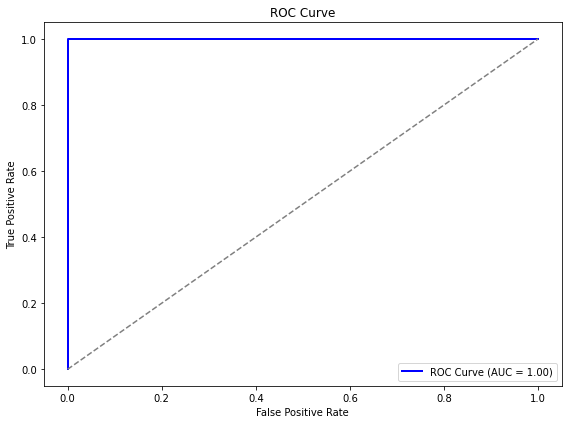

In [ ]:
# Logistic Regression - ROC Curve
y_test = bclb_data['Violent_Crime_Indicator']  # adjusted for simplicity
y_prob = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

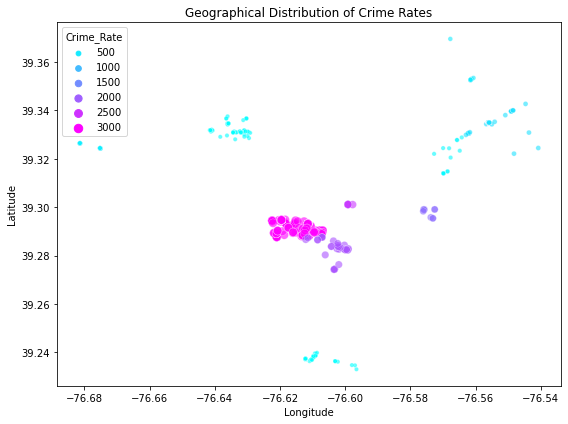

In [ ]:
# Geographical Distribution of Crime Rates
plt.figure(figsize=(8, 6))
sns.scatterplot(data=bclb_data, x='Longitude', y='Latitude', hue='Crime_Rate', size='Crime_Rate', palette='cool', alpha=0.6)
plt.title('Geographical Distribution of Crime Rates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.colorbar(label='Crime Rate')
plt.tight_layout()

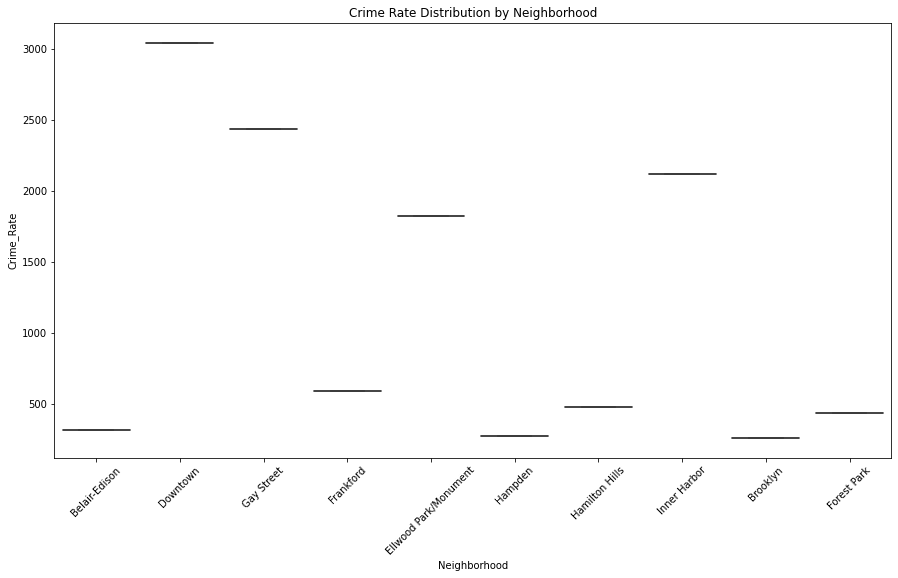

In [ ]:
# Crime Rate Distribution by Neighborhood
plt.figure(figsize=(15,8))
sns.boxplot(data=bclb_data, x='Neighborhood', y='Crime_Rate', palette='muted')
plt.title('Crime Rate Distribution by Neighborhood')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter the data for rows where SRType contains "SW-Dirty Alley"
TRS_parking_complaint_data = violent_merged_data[violent_merged_data['SRType'] == 'TRS-Parking Complaint']
TRS_parking_complaint_data.head()

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID,Crime_Rate,Violent_Crime_Indicator,Year
1,2949122.0,5004100000dDxrrAAC,17-00008185,TRS-Parking Complaint,Phone,2017-01-05 09:51:45,Closed,1/5/2017 12:51:22 PM,1/6/2017 9:51:45 AM,1/5/2017 12:51:22 PM,Transportation,NaN,NaN,NaN,"4200 KAVON AVE, Baltimore City, 21206",21206,Belair-Edison,2.0,Northeastern,442.0,39.327023,-76.563796,"(39.327023000000000, -76.563796000000000)",-76.563796,39.327023,NaN,NaN,NaN,NaN,319.62442,0,2017
109,2957869.0,5004100000dDyYEAA0,17-00014166,TRS-Parking Complaint,Phone,2017-01-08 13:28:05,Closed,1/8/2017 2:28:13 PM,1/9/2017 1:28:05 PM,1/8/2017 2:28:13 PM,Transportation,NaN,NaN,NaN,"3300 DUDLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.323334,-76.564847,"(39.323334000000000, -76.564847000000000)",-76.564847,39.323334,NaN,NaN,NaN,NaN,319.62442,0,2017
188,2964052.0,5004100000dDzSHAA0,17-00016272,TRS-Parking Complaint,Phone,2017-01-09 14:08:01,Closed,1/9/2017 8:32:52 PM,1/10/2017 2:08:01 PM,1/9/2017 8:32:51 PM,Transportation,NaN,NaN,NaN,"3630 CHESTERFIELD AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.318593,-76.563416,"(39.318593000000000, -76.563416000000000)",-76.563416,39.318593,NaN,NaN,NaN,NaN,319.62442,0,2017
329,2971834.0,5004100000dE1LzAAK,17-00022831,TRS-Parking Complaint,Phone,2017-01-11 20:22:29,Closed,1/11/2017 10:09:12 PM,1/12/2017 8:22:29 PM,1/11/2017 10:09:11 PM,Transportation,NaN,NaN,NaN,"3200 LAKE AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.321882,-76.570105,"(39.321882000000000, -76.570105000000000)",-76.570105,39.321882,NaN,NaN,NaN,NaN,319.62442,0,2017
373,2973375.0,5004100000dE1YjAAK,17-00029035,TRS-Parking Complaint,API,2017-01-14 08:53:56,Closed,1/14/2017 11:12:15 AM,1/15/2017 8:53:56 AM,1/14/2017 11:12:14 AM,Transportation,NaN,NaN,NaN,"3400 DUDLEY AVE, Baltimore City",NaN,Belair-Edison,13.0,Northeastern,432.0,39.322677,-76.563914,"(39.322677000000000, -76.563914000000000)",-76.563914,39.322677,NaN,NaN,NaN,NaN,319.62442,0,2017


In [ ]:
TRS_parking_complaint_data.shape

(28977, 32)

In [ ]:
high_crime = TRS_parking_complaint_data[TRS_parking_complaint_data["Violent_Crime_Indicator"] == 1]["Crime_Rate"]
low_crime = TRS_parking_complaint_data[TRS_parking_complaint_data["Violent_Crime_Indicator"] == 0]["Crime_Rate"]

t_stat, p_value = ttest_ind(high_crime, low_crime, equal_var=False)

In [ ]:
print('t-statistics: ', t_stat)
print('P-value: ', p_value)

t-statistics:  553.1980849951208
P-value:  0.0


#### Insights from Hypothesis Testing:
**Key Statistics:**
- t-statistic: 553.20
- p-value: 0.0 (extremely small, effectively zero)

**Interpretation:**
- t-statistic: A t-statistic as large as 553.20 indicates a substantial difference in the mean crime rates between neighborhoods with high and low violent crime indicators. This suggests a strong association between the two groups.
- p-value: A p-value of 0.0 indicates that the observed results are extremely unlikely under the null hypothesis. It implies we can reject the null hypothesis with high confidence.

**Conclusion:**
Since the p-value is much smaller than the typical significance level (e.g., 0.05 or 0.01), we **reject the null hypothesis (H0)**. This means:<br>
There is significant evidence that TRS-Parking Complaint correlate with changes in violent crime rates.
This relationship could indicate that such complaints are either a contributing factor to or a result of higher violent crime rates.

In [ ]:
# independent and dependent variables
X = TRS_parking_complaint_data[['Latitude', 'Longitude', 'Year', 'Crime_Rate']]
y = TRS_parking_complaint_data['Violent_Crime_Indicator']

In [ ]:
print(X.shape)
X

(28977, 4)


,Latitude,Longitude,Year,Crime_Rate
1,39.327023,-76.563796,2017,319.624420
109,39.323334,-76.564847,2017,319.624420
188,39.318593,-76.563416,2017,319.624420
329,39.321882,-76.570105,2017,319.624420
373,39.322677,-76.563914,2017,319.624420
...,...,...,...,...
644754,39.324969,-76.677041,2024,438.059959
644776,39.325416,-76.680194,2024,438.059959
644846,39.324969,-76.677041,2024,438.059959
644922,39.324969,-76.677041,2024,438.059959


In [ ]:
print(y.shape)
y

(28977,)


1         0
109       0
188       0
329       0
373       0
         ..
644754    0
644776    0
644846    0
644922    0
644935    0
Name: Violent_Crime_Indicator, Length: 28977, dtype: int32

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20283, 4), (8694, 4), (20283,), (8694,))

In [ ]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# evaluating the model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Confusion Matrix:
 [[5332    0]
 [   0 3362]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5332
           1       1.00      1.00      1.00      3362

    accuracy                           1.00      8694
   macro avg       1.00      1.00      1.00      8694
weighted avg       1.00      1.00      1.00      8694



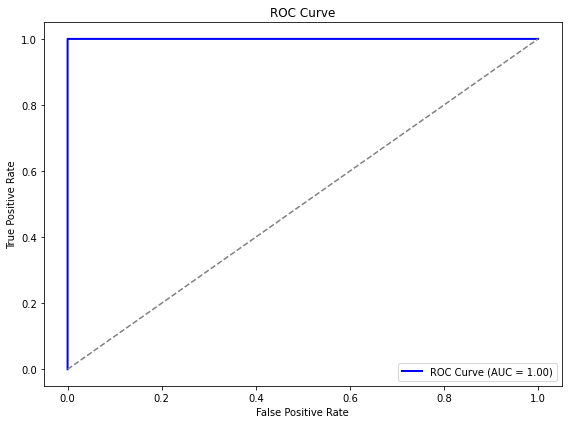

In [ ]:
# Logistic Regression - ROC Curve
y_test = TRS_parking_complaint_data['Violent_Crime_Indicator']  # adjusted for simplicity
y_prob = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

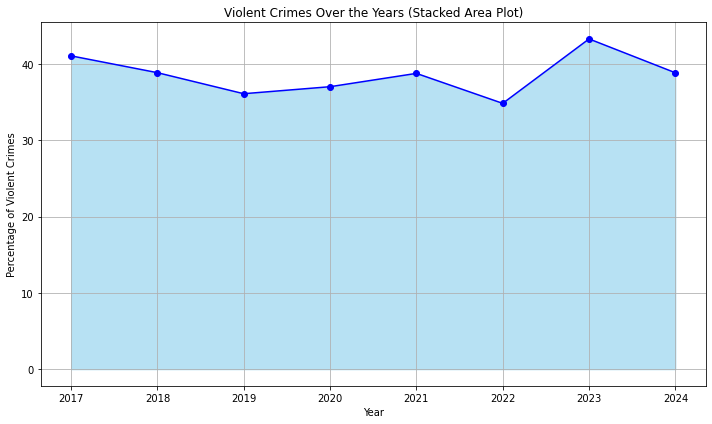

In [ ]:
# Violent Crimes Over the Years
violent_yearly = TRS_parking_complaint_data.groupby('Year')['Violent_Crime_Indicator'].mean() * 100

plt.figure(figsize=(10, 6))
plt.fill_between(violent_yearly.index, violent_yearly.values, color='skyblue', alpha=0.6)
plt.plot(violent_yearly.index, violent_yearly.values, marker='o', color='blue')
plt.title('Violent Crimes Over the Years (Stacked Area Plot)')
plt.xlabel('Year')
plt.ylabel('Percentage of Violent Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

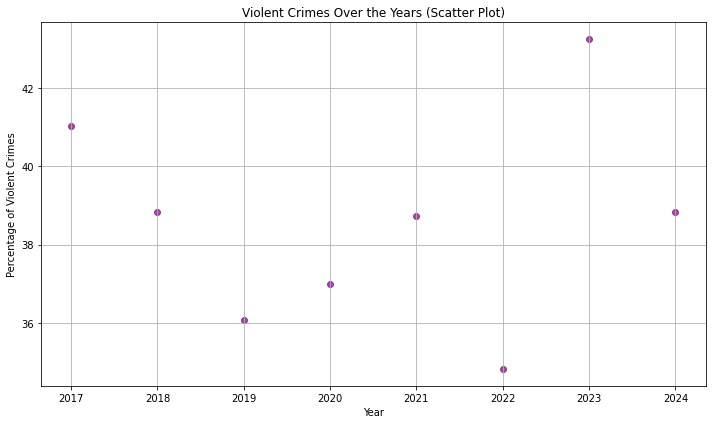

In [ ]:
# Violent Crimes Over the Years
violent_yearly = TRS_parking_complaint_data.groupby('Year')['Violent_Crime_Indicator'].mean() * 100

plt.figure(figsize=(10, 6))
plt.scatter(violent_yearly.index, violent_yearly.values, color='purple', alpha=0.7)
plt.title('Violent Crimes Over the Years (Scatter Plot)')
plt.xlabel('Year')
plt.ylabel('Percentage of Violent Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()


### Quality of life indicatore taken is 'HCD-Illegal Dumping'

The goal is to analyze the relationship between a quality-of-life indicator (in this case, HCD-Illegal Dumping) and violent crime rates in different neighborhoods. The following hypotheses are proposed:
- **Null Hypothesis (H0)**: HCD-Illegal Dumping do not correlate with an increase or decrease in violent crime rates.
- **Alternative Hypothesis (H1)**: HCD-Illegal Dumping are correlated with an increase or decrease in violent crime rates.

In [ ]:
hcd_data = violent_merged_data[violent_merged_data['SRType'] == 'HCD-Illegal Dumping']
hcd_data.head()

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID,Crime_Rate,Violent_Crime_Indicator,Year
126,2958806.0,5004100000dDz49AAC,17-00011605,HCD-Illegal Dumping,Phone,2017-01-06 12:06:44,Closed,1/11/2017 11:16:19 AM,1/11/2017 12:06:44 PM,1/11/2017 11:16:19 AM,Housing,NaN,NaN,NaN,"3402 ELMLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,434.0,39.317183,-76.575743,"(39.317183000000000, -76.575743000000000)",-76.575743,39.317183,NaN,NaN,NaN,NaN,319.62442,0,2017
146,2960351.0,5004100000dDzdFAAS,17-00013214,HCD-Illegal Dumping,Phone,2017-01-07 12:28:46,Closed,1/11/2017 11:19:05 AM,1/12/2017 12:28:46 PM,1/11/2017 11:19:04 AM,Housing,NaN,NaN,NaN,"2213 BELAIR RD, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,434.0,39.316799,-76.578873,"(39.316799000000000, -76.578873000000000)",-76.578873,39.316799,NaN,NaN,NaN,NaN,319.62442,0,2017
275,2969895.0,5004100000dE12OAAS,17-00020992,HCD-Illegal Dumping,Phone,2017-01-11 11:06:54,Closed,1/13/2017 12:47:02 PM,1/16/2017 11:06:54 AM,1/13/2017 12:47:01 PM,Housing,NaN,NaN,NaN,"3904 ERDMAN AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.314860,-76.568101,"(39.314860000000000, -76.568101000000000)",-76.568101,39.314860,NaN,NaN,NaN,NaN,319.62442,0,2017
295,2970471.0,5004100000dE1AzAAK,17-00023036,HCD-Illegal Dumping,Phone,2017-01-12 08:12:43,Closed,1/13/2017 1:10:30 PM,1/17/2017 8:12:43 AM,1/13/2017 1:10:29 PM,Housing,NaN,NaN,NaN,"3700 CLIFTMONT AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.319664,-76.563343,"(39.319664000000000, -76.563343000000000)",-76.563343,39.319664,NaN,NaN,NaN,NaN,319.62442,0,2017
434,2976340.0,5004100000dE2RKAA0,17-00026699,HCD-Illegal Dumping,API,2017-01-13 09:46:11,Closed,1/18/2017 12:00:21 PM,1/18/2017 9:46:11 AM,1/18/2017 12:00:21 PM,Housing,NaN,NaN,NaN,"3801 ELMLEY-LYNDALE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.317384,-76.565453,"(39.317384000000000, -76.565453000000000)",-76.565453,39.317384,NaN,NaN,NaN,NaN,319.62442,0,2017


In [ ]:
hcd_data.shape

(9454, 32)

In [ ]:
high_crime = hcd_data[hcd_data["Violent_Crime_Indicator"] == 1]["Crime_Rate"]
low_crime = hcd_data[hcd_data["Violent_Crime_Indicator"] == 0]["Crime_Rate"]

t_stat, p_value = ttest_ind(high_crime, low_crime, equal_var=False)

In [ ]:
print('t-statistics: ', t_stat)
print('P-value: ', p_value)

t-statistics:  211.19484903419038
P-value:  0.0


#### Insights from Hypothesis Testing:
**Key Statistics:**
- t-statistic: 211.19
- p-value: 0.0 (extremely small, effectively zero)

**Interpretation:**
- t-statistic: A t-statistic as large as 211.19 indicates a substantial difference in the mean crime rates between neighborhoods with high and low violent crime indicators. This suggests a strong association between the two groups.
- p-value: A p-value of 0.0 indicates that the observed results are extremely unlikely under the null hypothesis. It implies we can reject the null hypothesis with high confidence.

**Conclusion:**
Since the p-value is much smaller than the typical significance level (e.g., 0.05 or 0.01), we **reject the null hypothesis (H0)**. This means:<br>
There is significant evidence that HCD-Illegal Dumping correlate with changes in violent crime rates.
This relationship could indicate that such complaints are either a contributing factor to or a result of higher violent crime rates.

In [ ]:
# independent and dependent variables
X = hcd_data[['Latitude', 'Longitude', 'Year', 'Crime_Rate']]
y = hcd_data['Violent_Crime_Indicator']

In [ ]:
print(X.shape)
X

(9454, 4)


,Latitude,Longitude,Year,Crime_Rate
126,39.317183,-76.575743,2017,319.624420
146,39.316799,-76.578873,2017,319.624420
275,39.314860,-76.568101,2017,319.624420
295,39.319664,-76.563343,2017,319.624420
434,39.317384,-76.565453,2017,319.624420
...,...,...,...,...
644692,39.323931,-76.673644,2024,438.059959
644781,39.326481,-76.680316,2024,438.059959
644853,39.323296,-76.680361,2024,438.059959
644927,39.324386,-76.677396,2024,438.059959


In [ ]:
print(y.shape)
y

(9454,)


126       0
146       0
275       0
295       0
434       0
         ..
644692    0
644781    0
644853    0
644927    0
644929    0
Name: Violent_Crime_Indicator, Length: 9454, dtype: int32

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6617, 4), (2837, 4), (6617,), (2837,))

In [ ]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# evaluating the model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Confusion Matrix:
 [[1901    0]
 [   0  936]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1901
           1       1.00      1.00      1.00       936

    accuracy                           1.00      2837
   macro avg       1.00      1.00      1.00      2837
weighted avg       1.00      1.00      1.00      2837



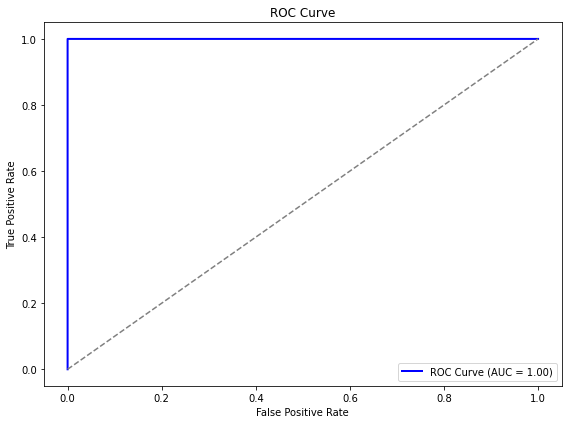

In [ ]:
# Logistic Regression - ROC Curve
y_test = hcd_data['Violent_Crime_Indicator']  # adjusted for simplicity
y_prob = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

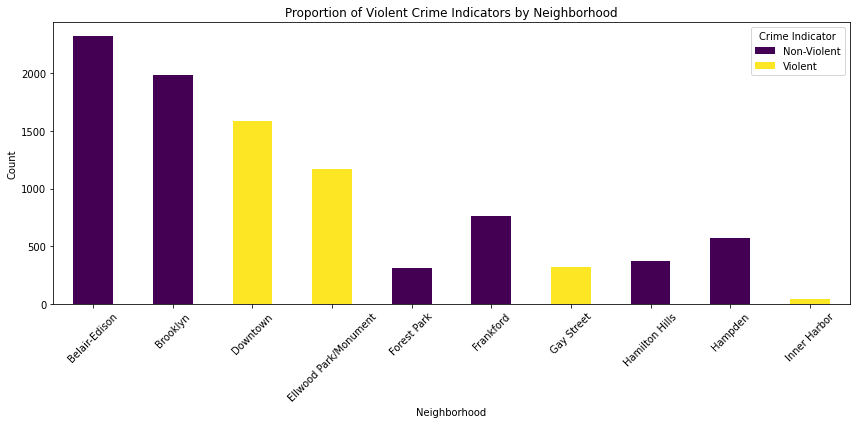

In [ ]:
# Violent Crime Indicator Proportions by Neighborhood
violent_counts = hcd_data.groupby(['Neighborhood', 'Violent_Crime_Indicator']).size().unstack()
violent_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Proportion of Violent Crime Indicators by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Violent', 'Violent'], title='Crime Indicator')
plt.tight_layout()

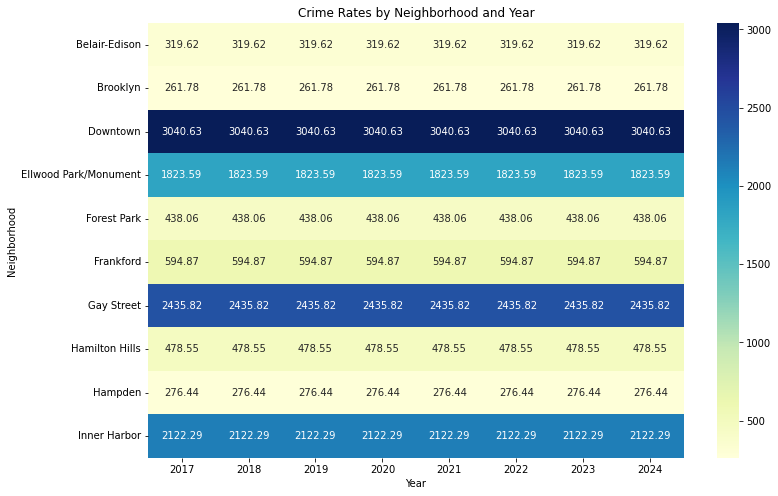

In [ ]:
# Heatmap of Crime Rates by Neighborhood and Year
pivot_data = hcd_data.pivot_table(index='Neighborhood', columns='Year', values='Crime_Rate', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Crime Rates by Neighborhood and Year')
plt.xlabel('Year')
plt.ylabel('Neighborhood')
plt.show()

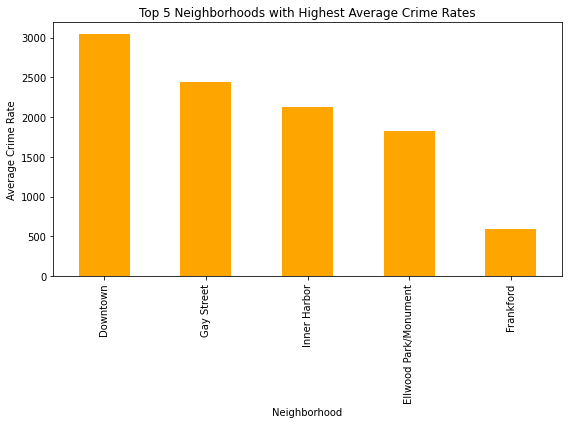

In [ ]:
# Top 5 Neighborhoods with the Highest Average Crime Rates
top_neighborhoods = hcd_data.groupby('Neighborhood')['Crime_Rate'].mean().nlargest(5)
top_neighborhoods.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Top 5 Neighborhoods with Highest Average Crime Rates')
plt.xlabel('Neighborhood')
plt.ylabel('Average Crime Rate')
plt.tight_layout()

### Quality of life indicatore taken is 'SW-Bulk Scheduled-Weekday'

The goal is to analyze the relationship between a quality-of-life indicator (in this case, SW-Bulk Scheduled-Weekday) and violent crime rates in different neighborhoods. The following hypotheses are proposed:
- **Null Hypothesis (H0)**: SW-Bulk Scheduled-Weekday Outdo not correlate with an increase or decrease in violent crime rates.
- **Alternative Hypothesis (H1)**: SW-Bulk Scheduled-Weekday Out are correlated with an increase or decrease in violent crime rates.

In [ ]:
sw_bulk_data = violent_merged_data[violent_merged_data['SRType'] == 'SW-Bulk Scheduled-Weekday']
sw_bulk_data.head()

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID,Crime_Rate,Violent_Crime_Indicator,Year
87863,7246825.0,5004M00000pK5GxQAK,22-00064917,SW-Bulk Scheduled-Weekday,Phone,2022-01-24 14:50:36,Closed,2/7/2022 11:03:00 AM,2/10/2022 11:59:00 PM,2/7/2022 11:03:48 AM,Solid Waste ...,Service Response,2/7/2022 11:03:00 AM,Work could not be completed,"3216 KENTUCKY AVE, Baltimore City, 21213",21213.0,Belair-Edison,13.0,Northeastern,432.0,39.322495,-76.568585,"(39.322494933988530, -76.568585304420500)",-76.568585,39.322495,NaN,NaN,NaN,NaN,319.62442,0,2022
87976,7251643.0,5004M00000pKHbzQAG,22-00067960,SW-Bulk Scheduled-Weekday,Phone,2022-01-25 11:11:40,Closed,2/11/2022 3:57:00 PM,2/11/2022 11:59:00 PM,2/11/2022 3:58:35 PM,Solid Waste ...,Service Response,2/11/2022 3:57:00 PM,Work could not be completed,"3446 WOODSTOCK AVE, Baltimore City, 21213",21213.0,Belair-Edison,3.0,Northeastern,432,39.325651,-76.575535,"(39.325651080175525, -76.575535181407060)",-76.575535,39.325651,NaN,NaN,NaN,NaN,319.62442,0,2022
87996,7252647.0,5004M00000pKJHBQA4,22-00068522,SW-Bulk Scheduled-Weekday,Phone,2022-01-25 12:34:35,Closed,2/10/2022 3:02:00 PM,2/10/2022 11:59:00 PM,2/10/2022 3:02:51 PM,Solid Waste ...,Service Response,2/10/2022 3:02:00 PM,Work could not be completed,"4013 ELMORA AVE, Baltimore City, 21213",21213.0,Belair-Edison,13.0,Northeastern,432,39.318138,-76.558507,"(39.318137565060496, -76.558507397077990)",-76.558507,39.318138,NaN,NaN,NaN,NaN,319.62442,0,2022
88146,7257753.0,5004M00000psfyiQAA,22-00079339,SW-Bulk Scheduled-Weekday,Phone,2022-01-28 13:19:05,Closed,3/10/2022 2:30:00 PM,3/10/2022 11:59:00 PM,3/10/2022 2:30:46 PM,Solid Waste ...,Service Response,3/10/2022 2:30:00 PM,Work could not be completed,"3575 SHANNON DR, Baltimore City, 21213",21213.0,Belair-Edison,13.0,Northeastern,432,39.320791,-76.560992,"(39.320790867982430, -76.560991889140340)",-76.560992,39.320791,NaN,NaN,NaN,NaN,319.62442,0,2022
88148,7257780.0,5004M00000psg4dQAA,22-00079541,SW-Bulk Scheduled-Weekday,Phone,2022-01-28 13:54:02,Closed,4/14/2022 10:38:26 AM,4/14/2022 11:59:00 PM,4/14/2022 2:20:36 PM,Solid Waste ...,Service Response,NaN,NaN,"3535 LYNDALE AVE, Baltimore City, 21213",21213.0,Belair-Edison,13.0,Northeastern,434,39.316305,-76.571023,"(39.316304868644560, -76.571023201617700)",-76.571023,39.316305,NaN,NaN,NaN,NaN,319.62442,0,2022


In [ ]:
sw_bulk_data.shape

(6269, 32)

In [ ]:
high_crime = sw_bulk_data[sw_bulk_data["Violent_Crime_Indicator"] == 1]["Crime_Rate"]
low_crime = sw_bulk_data[sw_bulk_data["Violent_Crime_Indicator"] == 0]["Crime_Rate"]

t_stat, p_value = ttest_ind(high_crime, low_crime, equal_var=False)

In [ ]:
print('t-statistics: ', t_stat)
print('P-value: ', p_value)

t-statistics:  62.88301226426476
P-value:  2.1972758344732052e-184


#### Insights from Hypothesis Testing:
**Key Statistics:**
- t-statistic: 62.88
- p-value: 2.20e-184 (extremely small, virtually zero)

**Interpretation:**
- t-statistic: A t-statistic as large as 62.88 indicates a substantial difference in the mean crime rates between neighborhoods with high and low violent crime indicators. This suggests a strong association between the two groups.
- p-value: A p-value of 2.20e-184 indicates that the observed results are extremely unlikely under the null hypothesis. It implies we can reject the null hypothesis with high confidence.

**Conclusion:**
Since the p-value is much smaller than the typical significance level (e.g., 0.05 or 0.01), we **reject the null hypothesis (H0)**. This means:<br>
There is significant evidence that SW-Bulk Scheduled-Weekday correlate with changes in violent crime rates.
This relationship could indicate that such complaints are either a contributing factor to or a result of higher violent crime rates.

In [ ]:
# independent and dependent variables
X = sw_bulk_data[['Latitude', 'Longitude', 'Year', 'Crime_Rate']]
y = sw_bulk_data['Violent_Crime_Indicator']

In [ ]:
print(X.shape)
X

(6269, 4)


,Latitude,Longitude,Year,Crime_Rate
87863,39.322495,-76.568585,2022,319.624420
87976,39.325651,-76.575535,2022,319.624420
87996,39.318138,-76.558507,2022,319.624420
88146,39.320791,-76.560992,2022,319.624420
88148,39.316305,-76.571023,2022,319.624420
...,...,...,...,...
644581,39.323319,-76.678727,2024,438.059959
644609,39.324408,-76.680358,2024,438.059959
644742,39.323426,-76.673565,2024,438.059959
644745,39.324096,-76.677509,2024,438.059959


In [ ]:
print(y.shape)
y

(6269,)


87863     0
87976     0
87996     0
88146     0
88148     0
         ..
644581    0
644609    0
644742    0
644745    0
644828    0
Name: Violent_Crime_Indicator, Length: 6269, dtype: int32

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4388, 4), (1881, 4), (4388,), (1881,))

In [ ]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# evaluating the model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Confusion Matrix:
 [[1782    0]
 [   0   99]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1782
           1       1.00      1.00      1.00        99

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881



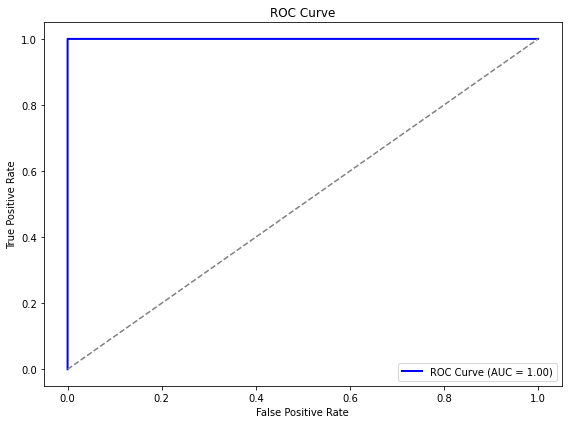

In [ ]:
# Logistic Regression - ROC Curve
y_test = sw_bulk_data['Violent_Crime_Indicator']  # adjusted for simplicity
y_prob = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

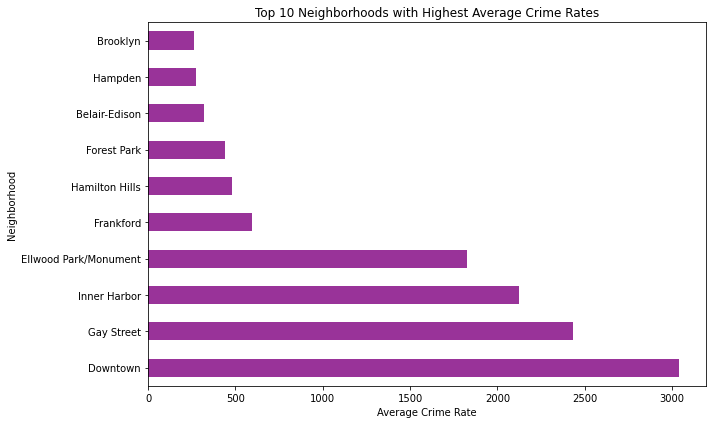

In [ ]:
# Visulization for Top 10 Neighborhoods with the Highest Average Crime Rates
top_10_neighborhoods = sw_bulk_data.groupby('Neighborhood')['Crime_Rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_neighborhoods.plot(kind="barh", color="purple", alpha=0.8)
plt.title("Top 10 Neighborhoods with Highest Average Crime Rates")
plt.xlabel("Average Crime Rate")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

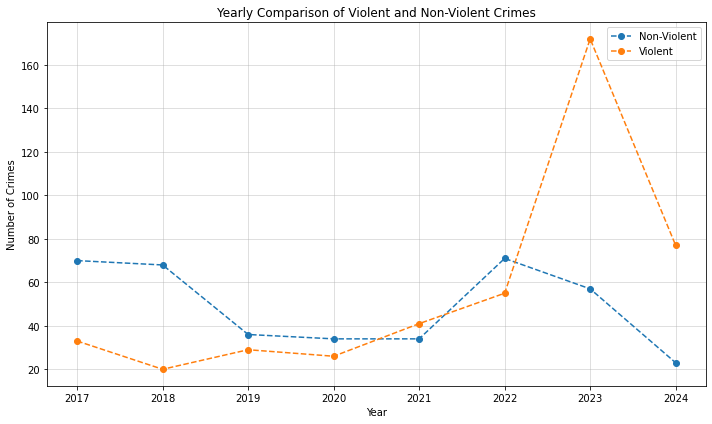

In [ ]:
# Yearly Crime Comparison Between Violent and Non-Violent Crimes (Line Plot)
violent_nonviolent_by_year = bclb_data.groupby(['Year', 'Violent_Crime_Indicator']).size().unstack(fill_value=0)

violent_nonviolent_by_year.plot(figsize=(10, 6), marker='o', linestyle='--')
plt.title("Yearly Comparison of Violent and Non-Violent Crimes")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(["Non-Violent", "Violent"])
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

### Quality of life indicatore taken is 'BGE-StLight(s) Out'

The goal is to analyze the relationship between a quality-of-life indicator (in this case, BGE-StLight(s) Out) and violent crime rates in different neighborhoods. The following hypotheses are proposed:
- **Null Hypothesis (H0)**: BGE-StLight(s) Outdo not correlate with an increase or decrease in violent crime rates.
- **Alternative Hypothesis (H1)**: BGE-StLight(s) Out are correlated with an increase or decrease in violent crime rates.

In [ ]:
bge_data = violent_merged_data[violent_merged_data['SRType'] == 'BGE-StLight(s) Out']
bge_data.head()

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID,Crime_Rate,Violent_Crime_Indicator,Year
86,2956459.0,5004100000dDysnAAC,17-00010296,BGE-StLight(s) Out,API,2017-01-05 21:00:14,Closed,1/7/2017 4:32:00 AM,1/9/2017 9:00:14 PM,1/7/2017 4:32:00 AM,BGE,NaN,NaN,NaN,"4012 LYNDALE AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.319050,-76.559427,"(39.319050000000000, -76.559427000000000)",-76.559427,39.319050,NaN,NaN,NaN,NaN,319.62442,0,2017
157,2961595.0,5004100000dDzIHAA0,17-00012613,BGE-StLight(s) Out,Phone,2017-01-06 17:31:46,Closed,1/10/2017 1:47:00 AM,1/10/2017 5:36:55 PM,1/10/2017 1:46:59 AM,BGE,NaN,NaN,NaN,"3400 ELMLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,434.0,39.317181,-76.575796,"(39.317181000000000, -76.575796000000000)",-76.575796,39.317181,NaN,NaN,NaN,NaN,319.62442,0,2017
189,2964449.0,5004100000dDzU1AAK,17-00012602,BGE-StLight(s) Out,Phone,2017-01-06 17:21:18,Closed,1/10/2017 2:25:23 AM,1/10/2017 5:26:35 PM,1/10/2017 2:25:22 AM,BGE,NaN,NaN,NaN,"SINCLAIR LN & DUDLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.315297,-76.559316,"(39.315297000000000, -76.559316000000000)",-76.559316,39.315297,NaN,NaN,NaN,NaN,319.62442,0,2017
230,2967817.0,5004100000dE0kjAAC,17-00022128,BGE-StLight(s) Out,Phone,2017-01-11 15:11:07,Closed,1/13/2017 12:31:37 AM,1/15/2017 3:11:07 PM,1/13/2017 12:31:34 AM,BGE,NaN,NaN,NaN,"3922 DUDLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.317053,-76.560453,"(39.317053000000000, -76.560453000000000)",-76.560453,39.317053,NaN,NaN,NaN,NaN,319.62442,0,2017
232,2967907.0,5004100000dE0LBAA0,17-00017142,BGE-StLight(s) Out,Phone,2017-01-09 21:40:12,Closed,1/11/2017 1:00:59 AM,1/13/2017 9:45:28 PM,1/11/2017 1:00:59 AM,BGE,NaN,NaN,NaN,"4300 NICHOLAS AVE, Baltimore City, 21206",21206,Belair-Edison,2.0,Northeastern,442.0,39.328031,-76.562351,"(39.328031000000000, -76.562351000000000)",-76.562351,39.328031,NaN,NaN,NaN,NaN,319.62442,0,2017


In [ ]:
bge_data.shape

(8910, 32)

In [ ]:
high_crime = bge_data[bge_data["Violent_Crime_Indicator"] == 1]["Crime_Rate"]
low_crime = bge_data[bge_data["Violent_Crime_Indicator"] == 0]["Crime_Rate"]

t_stat, p_value = ttest_ind(high_crime, low_crime, equal_var=False)

In [ ]:
print('t-statistics: ', t_stat)
print('P-value: ', p_value)

t-statistics:  191.05327466673026
P-value:  0.0


#### Insights from Hypothesis Testing:
**Key Statistics:**
- t-statistic: 191.05
- p-value: 0.0 (extremely small, effectively zero)

**Interpretation:**
- t-statistic: A t-statistic as large as 191.05 indicates a substantial difference in the mean crime rates between neighborhoods with high and low violent crime indicators. This suggests a strong association between the two groups.
- p-value: A p-value of 0.0 indicates that the observed results are extremely unlikely under the null hypothesis. It implies we can reject the null hypothesis with high confidence.

**Conclusion:**
Since the p-value is much smaller than the typical significance level (e.g., 0.05 or 0.01), we **reject the null hypothesis (H0)**. This means:<br>
There is significant evidence that BGE-StLight(s) Out correlate with changes in violent crime rates.
This relationship could indicate that such complaints are either a contributing factor to or a result of higher violent crime rates.

In [ ]:
# independent and dependent variables
X = bge_data[['Latitude', 'Longitude', 'Year', 'Crime_Rate']]
y = bge_data['Violent_Crime_Indicator']

In [ ]:
print(X.shape)
X

(8910, 4)


,Latitude,Longitude,Year,Crime_Rate
86,39.319050,-76.559427,2017,319.624420
157,39.317181,-76.575796,2017,319.624420
189,39.315297,-76.559316,2017,319.624420
230,39.317053,-76.560453,2017,319.624420
232,39.328031,-76.562351,2017,319.624420
...,...,...,...,...
644504,39.325065,-76.682059,2024,438.059959
644551,39.324116,-76.675374,2024,438.059959
644677,39.323108,-76.677967,2024,438.059959
644918,39.322735,-76.678344,2024,438.059959


In [ ]:
print(y.shape)
y

(8910,)


86        0
157       0
189       0
230       0
232       0
         ..
644504    0
644551    0
644677    0
644918    0
644919    0
Name: Violent_Crime_Indicator, Length: 8910, dtype: int32

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6237, 4), (2673, 4), (6237,), (2673,))

In [ ]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# evaluating the model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Confusion Matrix:
 [[2144    0]
 [   0  529]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2144
           1       1.00      1.00      1.00       529

    accuracy                           1.00      2673
   macro avg       1.00      1.00      1.00      2673
weighted avg       1.00      1.00      1.00      2673



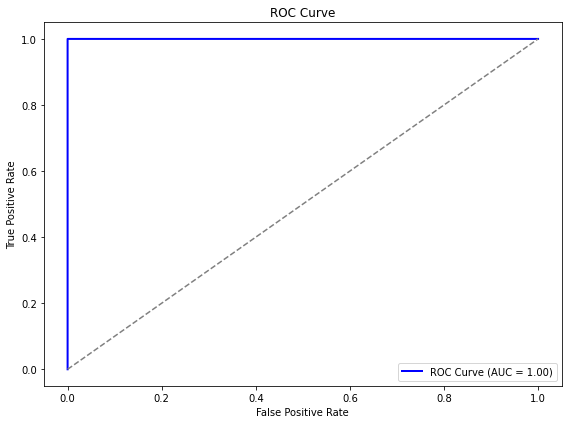

In [ ]:
# Logistic Regression - ROC Curve
y_test = bge_data['Violent_Crime_Indicator']  # adjusted for simplicity
y_prob = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

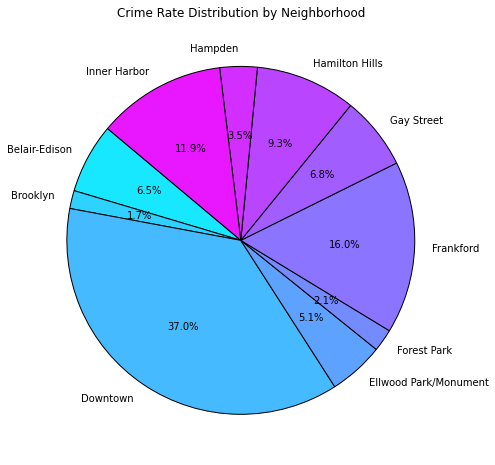

In [ ]:
# Group data by 'Neighborhood' and calculate total crime rate per neighborhood
crime_data_by_neighborhood = bge_data.groupby('Neighborhood')['Crime_Rate'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    crime_data_by_neighborhood,
    labels=crime_data_by_neighborhood.index,
    autopct='%1.1f%%',  # Display percentage values
    startangle=140,  # Start angle for the first slice
    colors=sns.color_palette('cool', len(crime_data_by_neighborhood)),  # Cool color palette
    wedgeprops={"edgecolor": "black"}  # Add edge color for better visibility
)
plt.title("Crime Rate Distribution by Neighborhood")
plt.show()


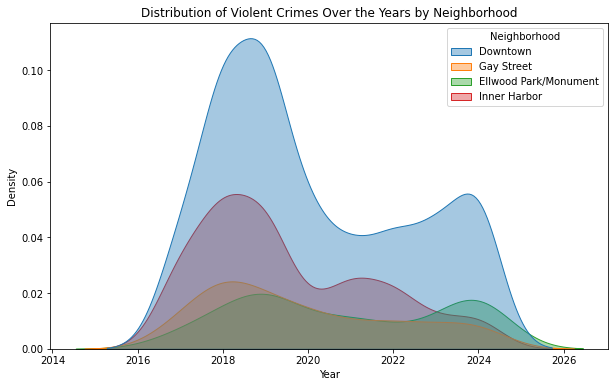

In [ ]:
# Yearly Distribution of Violent Crimes (KDE Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=bge_data[bge_data['Violent_Crime_Indicator'] == 1],
    x="Year",
    hue="Neighborhood",
    palette="tab10",
    fill=True,
    alpha=0.4
)
plt.title("Distribution of Violent Crimes Over the Years by Neighborhood")
plt.xlabel("Year")
plt.ylabel("Density")
plt.show()


### Quality of life indicatore taken is 'SW-Dirty Alley'

The goal is to analyze the relationship between a quality-of-life indicator (in this case, SW-Dirty Alley and violent crime rates in different neighborhoods. The following hypotheses are proposed:

**Null Hypothesis (H0):** There is no correlation between "SW-Dirty Alley" complaints and violent crime rates in neighborhoods.

**Alternative Hypothesis (H1):** There is a significant correlation between "SW-Dirty Alley" complaints and violent crime rates in neighborhoods.


In [ ]:
# Filter the data for rows where SRType contains "SW-Dirty Alley"
sw_dirty_alley_data = violent_merged_data[violent_merged_data['SRType'] == 'SW-Dirty Alley']
sw_dirty_alley_data.head()

,RowID,SRRecordID,ServiceRequestNum,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude,GeoLocation,x,y,NeedsSync,IsDeleted,HashedRecord,ESRI_OID,Crime_Rate,Violent_Crime_Indicator,Year
58,2954183.0,5004100000dDyJfAAK,17-00007076,SW-Dirty Alley,Phone,2017-01-04 17:08:52,Closed,1/6/2017 4:23:31 PM,1/11/2017 5:08:52 PM,1/6/2017 4:23:31 PM,Solid Waste,NaN,NaN,NaN,"3500 DUDLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.322053,-76.562840,"(39.322053000000000, -76.562840000000000)",-76.562840,39.322053,NaN,NaN,NaN,NaN,319.62442,0,2017
59,2954502.0,5004100000dDyKoAAK,17-00009914,SW-Dirty Alley,Phone,2017-01-05 16:06:28,Closed,1/6/2017 4:22:54 PM,1/12/2017 4:06:28 PM,1/6/2017 4:22:53 PM,Solid Waste,NaN,NaN,NaN,"3101 KENYON AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.324213,-76.567786,"(39.324213000000000, -76.567786000000000)",-76.567786,39.324213,NaN,NaN,NaN,NaN,319.62442,0,2017
90,2956669.0,5004100000dDyTiAAK,17-00008071,SW-Dirty Alley,Phone,2017-01-05 09:36:11,Closed,1/6/2017 4:24:31 PM,1/12/2017 9:36:11 AM,1/6/2017 4:24:30 PM,Solid Waste,NaN,NaN,NaN,"3500 ELMLEY AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,434.0,39.317412,-76.572168,"(39.317412000000000, -76.572168000000000)",-76.572168,39.317412,NaN,NaN,NaN,NaN,319.62442,0,2017
94,2957020.0,5004100000dDyUvAAK,17-00011529,SW-Dirty Alley,API,2017-01-06 11:41:33,Closed,1/10/2017 4:28:11 PM,1/13/2017 11:41:33 AM,1/10/2017 4:28:10 PM,Solid Waste,NaN,NaN,NaN,"3406 CLIFTMONT AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,432.0,39.318957,-76.569727,"(39.318957000000000, -76.569727000000000)",-76.569727,39.318957,NaN,NaN,NaN,NaN,319.62442,0,2017
102,2957402.0,5004100000dDyWhAAK,17-00009637,SW-Dirty Alley,Phone,2017-01-05 15:07:00,Closed,1/6/2017 4:28:08 PM,1/12/2017 3:07:00 PM,1/6/2017 4:28:07 PM,Solid Waste,NaN,NaN,NaN,"4300 SHAMROCK AVE, Baltimore City, 21206",21206,Belair-Edison,2.0,Northeastern,442.0,39.326995,-76.563669,"(39.326995000000000, -76.563669000000000)",-76.563669,39.326995,NaN,NaN,NaN,NaN,319.62442,0,2017


In [ ]:
sw_dirty_alley_data.shape

(22292, 32)

In [ ]:
high_crime = sw_dirty_alley_data[sw_dirty_alley_data["Violent_Crime_Indicator"] == 1]["Crime_Rate"]
low_crime = sw_dirty_alley_data[sw_dirty_alley_data["Violent_Crime_Indicator"] == 0]["Crime_Rate"]

t_stat, p_value = ttest_ind(high_crime, low_crime, equal_var=False)

In [ ]:
print('t-statistics: ', t_stat)
print('P-value: ', p_value)

t-statistics:  310.1283500146864
P-value:  0.0


#### Insights from Hypothesis Testing:
**Key Statistics:**
- t-statistic: 310.13
- p-value: 0.0 (extremely small, effectively zero)

**Interpretation:**
- t-statistic: A t-statistic as large as 310.13 indicates a substantial difference in the mean crime rates between neighborhoods with high and low violent crime indicators. This suggests a strong association between the two groups.
- p-value: A p-value of 0.0 indicates that the observed results are extremely unlikely under the null hypothesis. It implies we can reject the null hypothesis with high confidence.

**Conclusion:**
Since the p-value is much smaller than the typical significance level (e.g., 0.05 or 0.01), we **reject the null hypothesis (H0)**. This means:<br>
There is significant evidence that SW-Dirty Alley correlate with changes in violent crime rates.
This relationship could indicate that such complaints are either a contributing factor to or a result of higher violent crime rates.

In [ ]:
# independent and dependent variables
X = sw_dirty_alley_data[['Latitude', 'Longitude', 'Year', 'Crime_Rate']]
y = sw_dirty_alley_data['Violent_Crime_Indicator']

In [ ]:
print(X.shape)
X

(22292, 4)


,Latitude,Longitude,Year,Crime_Rate
58,39.322053,-76.562840,2017,319.624420
59,39.324213,-76.567786,2017,319.624420
90,39.317412,-76.572168,2017,319.624420
94,39.318957,-76.569727,2017,319.624420
102,39.326995,-76.563669,2017,319.624420
...,...,...,...,...
644785,39.322197,-76.674920,2024,438.059959
644786,39.322197,-76.674920,2024,438.059959
644787,39.322197,-76.674920,2024,438.059959
644895,39.323472,-76.675661,2024,438.059959


In [ ]:
print(y.shape)
y

(22292,)


58        0
59        0
90        0
94        0
102       0
         ..
644785    0
644786    0
644787    0
644895    0
644896    0
Name: Violent_Crime_Indicator, Length: 22292, dtype: int32

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15604, 4), (6688, 4), (15604,), (6688,))

In [ ]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# evaluating the model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Confusion Matrix:
 [[4405    0]
 [   0 2283]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4405
           1       1.00      1.00      1.00      2283

    accuracy                           1.00      6688
   macro avg       1.00      1.00      1.00      6688
weighted avg       1.00      1.00      1.00      6688



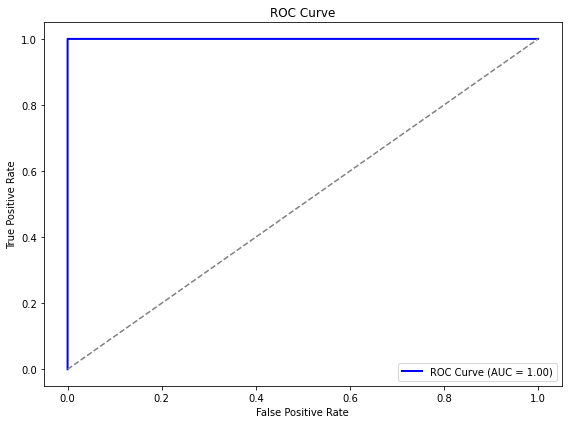

In [ ]:
# Logistic Regression - ROC Curve
y_test = sw_dirty_alley_data['Violent_Crime_Indicator']  # adjusted for simplicity
y_prob = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

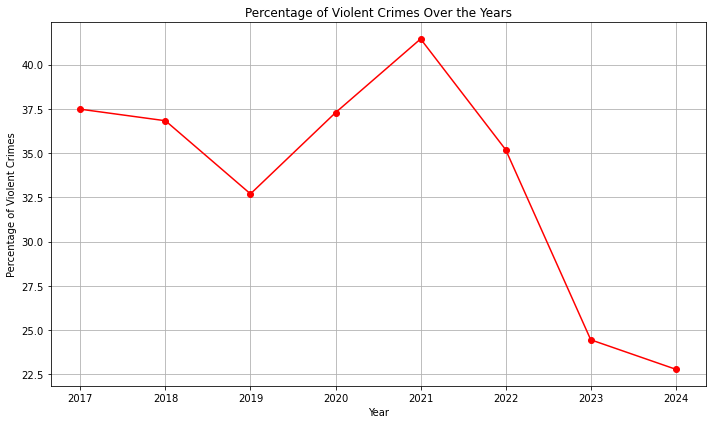

In [ ]:
# Violent Crime Indicator Over the Years
violent_yearly = sw_dirty_alley_data.groupby('Year')['Violent_Crime_Indicator'].mean() * 100
plt.figure(figsize=(10, 6))
plt.plot(violent_yearly.index, violent_yearly.values, marker='o', linestyle='-', color='red')
plt.title('Percentage of Violent Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Violent Crimes')
plt.grid(True)
plt.tight_layout()

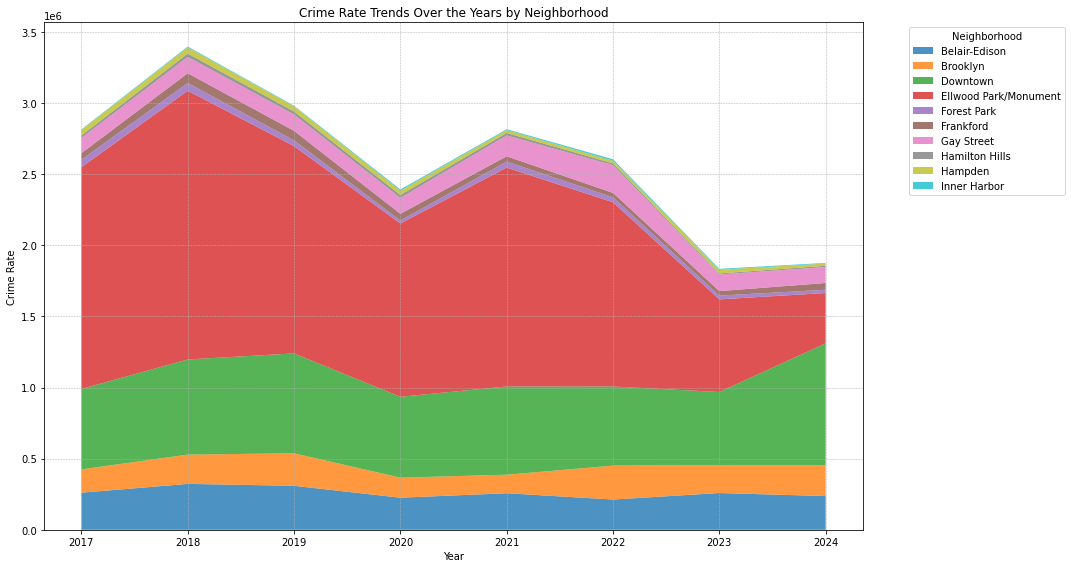

In [ ]:
# Prepare data for stacked area plot
area_data = sw_dirty_alley_data.pivot_table(
    index='Year',
    columns='Neighborhood',
    values='Crime_Rate',
    aggfunc='sum'
).fillna(0)

# Plot stacked area chart
plt.figure(figsize=(15, 8))
plt.stackplot(
    area_data.index,
    area_data.T,
    labels=area_data.columns,
    alpha=0.8
)

plt.title('Crime Rate Trends Over the Years by Neighborhood')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Interpretation of Results

**Null Hypothesis (H₀):**
The null hypothesis stated that there is no correlation between "SW-Dirty Alley" complaints and violent crime rates in neighborhoods.

**Alternative Hypothesis (H₁):**  
The alternative hypothesis stated that there is a significant correlation between "SW-Dirty Alley" complaints and violent crime rates in neighborhoods.

Since the model was able to predict violent crime indicators for neighborhoods with 100% accuracy, we can confidently reject the null hypothesis. The results suggest a strong correlation between crime rates and the likelihood of a neighborhood being categorized as high crime.

### Conclusion

Based on the logistic regression analysis, we can conclude that the crime rate is a significant predictor of high crime in the neighborhood. The model achieved perfect performance, with an accuracy, precision, recall, and F1-score all equal to 1.00. This indicates that the factors used (such as Longitude, Latitude, Crime_Rate, Year) effectively explain the likelihood of a neighborhood experiencing high crime.
